# Practice Embeddings 
according to deepschool.io Lesseson 06

Codes below references to deepschool.io
https://github.com/sachinruk/deepschool.io/blob/master/DL-Keras_Tensorflow/Lesson%2006%20-%20contraception.ipynb

I've added some comments for study purpose

In [3]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, merge, Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data/cmc.csv', header=None, names=['Age', 'Education', 'H_education', 'num_child', 'Religion', 'Employ', 'H_occupation', 'living_standard', 'Media_exposure', 'contraceptive'])
df.head()

,Age,Education,H_education,num_child,Religion,Employ,H_occupation,living_standard,Media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [5]:
#check missing value
df.isnull().any()

Age                False
Education          False
H_education        False
num_child          False
Religion           False
Employ             False
H_occupation       False
living_standard    False
Media_exposure     False
contraceptive      False
dtype: bool

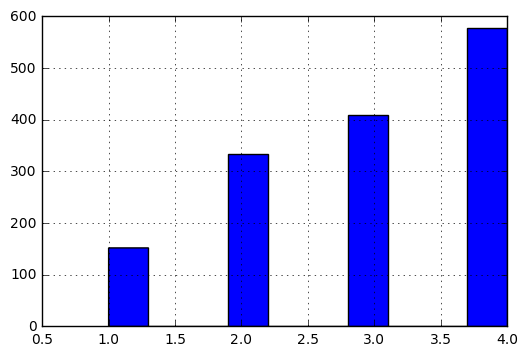

In [6]:
df.Education.hist()

In [7]:
df.shape

(1473, 10)

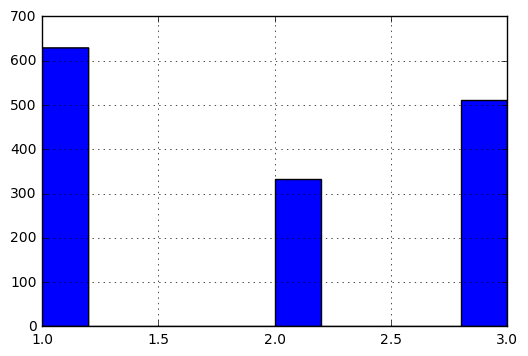

In [8]:
df.contraceptive.hist()

In [9]:
df.dtypes

Age                int64
Education          int64
H_education        int64
num_child          int64
Religion           int64
Employ             int64
H_occupation       int64
living_standard    int64
Media_exposure     int64
contraceptive      int64
dtype: object

In [10]:
def one_hot_encoding(idx):
    y = np.zeros((len(idx), max(idx)+1))
    y[np.arange(len(idx)), idx] = 1
    return y

## one hot encoding

Because categorical values designated via integer can mis-train machine learning.  

For religion categories (christianity-0, buddhaism-1, islam-2, hinduism-3, other-4)

we represent each category by one-hot encoding approach:

| original data | one-hot encoding format <td colspan=6>|
|--|--|
| | id | christianity | buddhaism | islam | hinduism | other |
| christianity | 1 | 1 | 0 | 0 | 0 | 0 |
| buddhaism | 2 | 0 | 1 | 0 | 0 | 0 |
| islam | 3 | 0 | 0 | 1 | 0 | 0 |
| hinduism | 4 | 0 | 0 | 0 | 1 | 0 |
| other | 5 | 0 | 0 | 0 | 0 | 1 |

In [11]:
idx = [0, 1, 2, 3, 4]
y = np.zeros((len(idx), max(idx)+1))
y

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [12]:
y[range(len(idx)), idx] = 1
#y[np.arange(len(idx)), idx] = 1
y

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [13]:
#Pandas also provides get_dummies function

pd.get_dummies(df.Education, prefix=['high_school_incomp', 'high_school_compl', 'college', 'futher_degree'])

,"['high_school_incomp', 'high_school_compl', 'college', 'futher_degree']_1","['high_school_incomp', 'high_school_compl', 'college', 'futher_degree']_2","['high_school_incomp', 'high_school_compl', 'college', 'futher_degree']_3","['high_school_incomp', 'high_school_compl', 'college', 'futher_degree']_4"
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0
9,1.0,0.0,0.0,0.0


## Scaling

is to preprocess data to have average=0 and distribtuion=1.  
Scaling prevent overflow and underflow

In [14]:
old_age = df.Age
print('old mean of Age:', np.mean(old_age, axis=0))
print('old std:', np.std(old_age, axis=0))

new_age = scale(old_age)
print('new mean of Age:', np.mean(new_age, axis=0))
print('new std:', np.std(new_age, axis=0))

old mean of Age: 32.53835709436524
old std: 8.224451598114449
new mean of Age: 2.99074335486e-16
new std: 1.0


/home/grace/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [15]:
# 파이프라인을 이용하기 위해서는 scale함수가 아니라 scalar 클래스를 구현해야한다.
# scale 함수와 대응되는 클래스는 StandardScaler이다

#fit으로 훈련 데이터를 활용하여 변환 계수 추정
#transform으로 실제 자료를 변환
age_child = df[['Age','num_child']]

scaler = StandardScaler()
scaler.fit(age_child)
new_age_by_class = scaler.transform(age_child)
print('old mean:', np.mean(age_child, axis=0))
print('old std:', np.std(age_child, axis=0))

print('new mean:', np.mean(new_age_by_class, axis=0))
print('new std:', np.std(new_age_by_class, axis=0))

#fit_transform()을 통해 동시에 실행가능

old mean: Age          32.538357
num_child     3.261371
dtype: float64
old std: Age          8.224452
num_child    2.357748
dtype: float64
new mean: [  2.99074335e-16  -7.23566941e-18]
new std: [ 1.  1.]


In [16]:
scaler = StandardScaler()
df[['Age', 'num_child']] = scaler.fit_transform(df[['Age', 'num_child']])

In [17]:
x = df[['Age', 'num_child', 'Employ', 'Media_exposure']].values
y = one_hot_encoding(df.contraceptive.values-1)

In [48]:
liv_cats = df.living_standard.max()
edu_cats = df.Education.max()

liv = df.living_standard.values-1
liv_one_hot = one_hot_encoding(liv)
edu = df.Education.values-1
edu_one_hot = one_hot_encoding(edu)

In [49]:
train_x, test_x, \
train_liv, test_liv,\
train_edu, test_edu,\
train_y, test_y = train_test_split(x, liv_one_hot, edu_one_hot, y, test_size=0.1, random_state=1)

In [50]:
train_x.shape

(1325, 4)

In [51]:
train_edu.shape

(1325, 4)

In [52]:
train_liv.shape

(1325, 4)

In [53]:
#np.hstack is concatenation along the second axis
#두개 이상의 배열을 옆으로 연결하여 열의 수가 더 많은 배열을 만든다
aa = [[1,2,3],
      [4,5,6]]
bb = [[7,8,9],
      [10,11,12]]

combined_2 = np.hstack([aa,bb])
print(combined_2)

#BUT when input is 1-D array, concatenation along the first axis
a = [1,2,3,4,5]
b = [6,7,8,9]

combined = np.hstack([a,b])
print(combined)

[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]
[1 2 3 4 5 6 7 8 9]


In [54]:
#np.vstack은 열의 수가 같은 두개 이상의 배열을 연결하여 행의 수가 더 많은 배열을 만든다.
aa = [[1,2,3],
      [4,5,6]]
bb = [[7,8,9],
      [10,11,12]]

combined_2 = np.vstack([aa,bb])
print(combined_2)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [55]:
train_x = np.hstack([train_x, train_edu, train_liv])
test_x = np.hstack([test_x, test_edu, test_liv])
train_x.shape

(1325, 12)

In [56]:
#model 순차모델

model = Sequential()
#모델의 입력값은 (첫번째 레이어는) 사용자로부터 주어진 입력값의 정보
model.add(Dense(input_dim=train_x.shape[1], output_dim=12))
model.add(Activation('relu'))
model.add(Dense(output_dim=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, nb_epoch=100, verbose=2)

/home/grace/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, input_dim=12)`
/home/grace/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=3)`
/home/grace/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
 - 0s - loss: 1.0736 - acc: 0.4196
Epoch 2/100
 - 0s - loss: 1.0164 - acc: 0.4558
Epoch 3/100
 - 0s - loss: 0.9983 - acc: 0.4725
Epoch 4/100
 - 0s - loss: 0.9866 - acc: 0.4860
Epoch 5/100
 - 0s - loss: 0.9783 - acc: 0.4981
Epoch 6/100
 - 0s - loss: 0.9713 - acc: 0.5125
Epoch 7/100
 - 0s - loss: 0.9647 - acc: 0.5238
Epoch 8/100
 - 0s - loss: 0.9591 - acc: 0.5358
Epoch 9/100
 - 0s - loss: 0.9541 - acc: 0.5434
Epoch 10/100
 - 0s - loss: 0.9495 - acc: 0.5502
Epoch 11/100
 - 0s - loss: 0.9455 - acc: 0.5472
Epoch 12/100
 - 0s - loss: 0.9421 - acc: 0.5509
Epoch 13/100
 - 0s - loss: 0.9390 - acc: 0.5532
Epoch 14/100
 - 0s - loss: 0.9360 - acc: 0.5547
Epoch 15/100
 - 0s - loss: 0.9335 - acc: 0.5562
Epoch 16/100
 - 0s - loss: 0.9311 - acc: 0.5547
Epoch 17/100
 - 0s - loss: 0.9290 - acc: 0.5585
Epoch 18/100
 - 0s - loss: 0.9273 - acc: 0.5592
Epoch 19/100
 - 0s - loss: 0.9252 - acc: 0.5570
Epoch 20/100
 - 0s - loss: 0.9236 - acc: 0.5547
Epoch 21/100
 - 0s - loss: 0.9222 - acc: 0.5555
E

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_5 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_6 (Activation)    (None, 3)                 0         
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [58]:
for w in model.get_weights():
    print(w.shape)

(12, 12)
(12,)
(12, 3)
(3,)


In [59]:
model.evaluate(test_x, test_y, batch_size=256)

148/148 [==============================] - 0s 167us/step


[0.85526365041732788, 0.60135138034820557]

In [60]:
model.predict(test_x[:10])

array([[ 0.26413348,  0.21689203,  0.51897448],
       [ 0.76925462,  0.1420006 ,  0.08874473],
       [ 0.26952514,  0.23453273,  0.49594206],
       [ 0.484512  ,  0.30060306,  0.21488501],
       [ 0.75211769,  0.15869322,  0.0891891 ],
       [ 0.17417434,  0.51307213,  0.31275356],
       [ 0.14898916,  0.38926655,  0.46174434],
       [ 0.75296396,  0.11855028,  0.12848574],
       [ 0.8097229 ,  0.02202768,  0.16824944],
       [ 0.69803709,  0.11388898,  0.18807401]], dtype=float32)

In [62]:
train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv,edu,y,test_size=0.1, random_state=1)